### 1 Klassificering av hj ̈art- och k ̈arlsjukdom (G)
I det h ̈ar momentet anv ̈ands ett dataset med data f ̈or hj ̈art-k ̈arlsjukdom. B ̈orja
med att ladda ned datam ̈angden fr ̊an Kaggle och l ̈as beskrivningen av inneh ̊allet.
Notera att denna datam ̈angd inneh ̊aller m ̊anga felaktigheter, exempelvis finns
negativa blodtryck och blodtryck som  ̈ar om ̈ojligt h ̈oga.
1.1 EDA
Anv ̈and pandas, matplotlib och seaborn f ̈or att besvara f ̈oljande fr ̊agor f ̈or da-
tasetet:

#### a) Hur många  ̈ar positiva för hjärt ̈karlsjukdom och hur m ̊anga  ̈ar negativa?
#### b) Hur stor andel har normala,  ̈over normala och l ̊angt  ̈over normala koles-terolv ̈arden?
#### c) Hur ser  ̊aldersf ̈ordelningen ut?
#### d) Hur stor andel r ̈oker?
#### e) Hur ser viktf ̈ordelningen ut?
#### f) Hur ser l ̈angdf ̈ordelningen ut?
#### g) Hur stor andel av kvinnor respektive m ̈an har hj ̈art-k ̈arlsjukdom?
Sammanfatta dina resultat och presentera dem i en notebook. Anv ̈and mark-
down boxar f ̈or l ̈opande tex

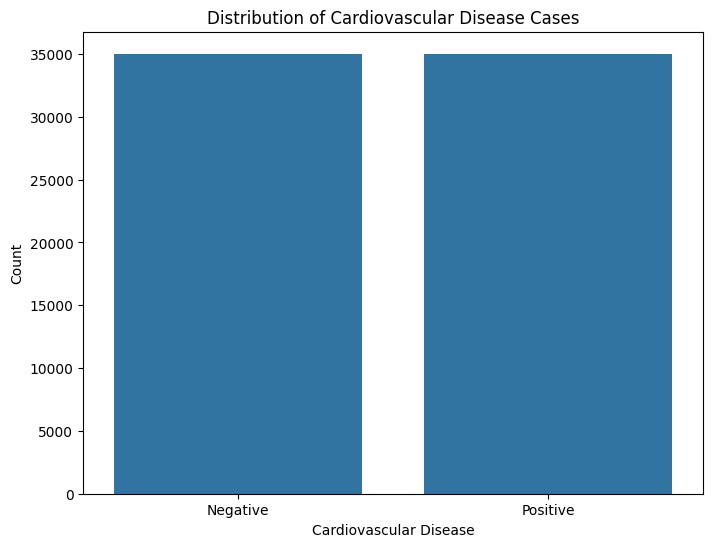

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/cardio_train.csv", sep=';')

df.head()

cardio_counts = df['cardio'].value_counts()

cardio_counts

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()



Ser tydligt att det nästan är 50/50 emellan de positiva och negativa svaren, vill utforska mer ifall det finns många rökare etc i de olika staplarna

Percentage with normal cholesterol levels: 74.83571428571429 %
Percentage with above-normal cholesterol levels: 13.641428571428571 %
Percentage with far-above-normal cholesterol levels: 11.522857142857143 %


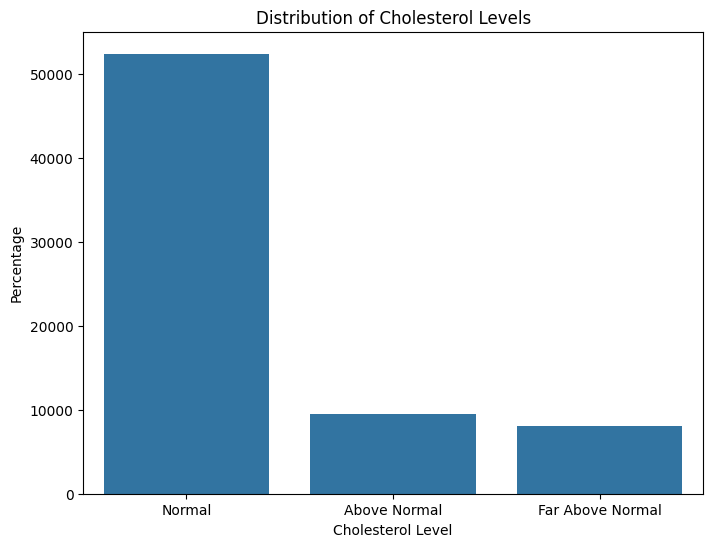

In [14]:
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Print out the percentages
print("Percentage with normal cholesterol levels:", cholesterol_counts[1], "%")
print("Percentage with above-normal cholesterol levels:", cholesterol_counts[2], "%")
print("Percentage with far-above-normal cholesterol levels:", cholesterol_counts[3], "%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', data=df, order=[1, 2, 3])
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Far Above Normal'])
plt.show()

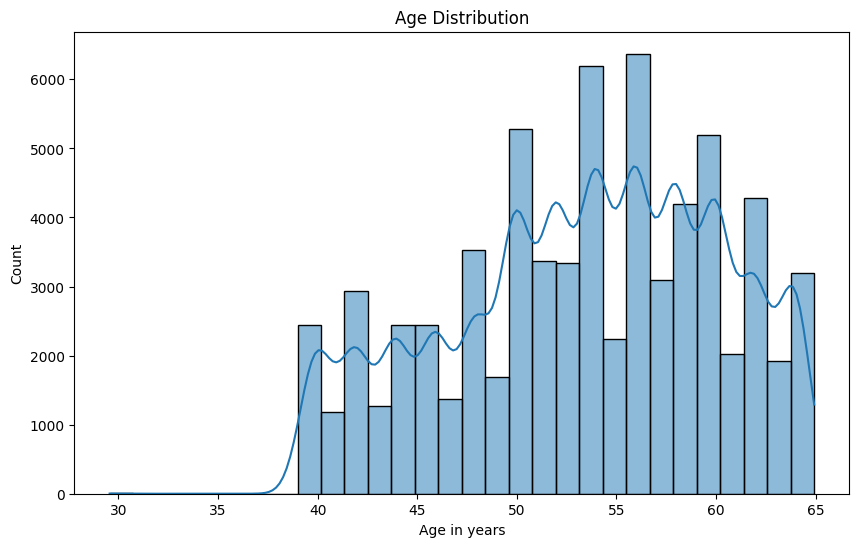

In [15]:
#c) Hur ser  ̊alders fördelningen ut?

df['age_years'] = df['age'] / 365.25


plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age in years')
plt.ylabel('Count')
plt.show()

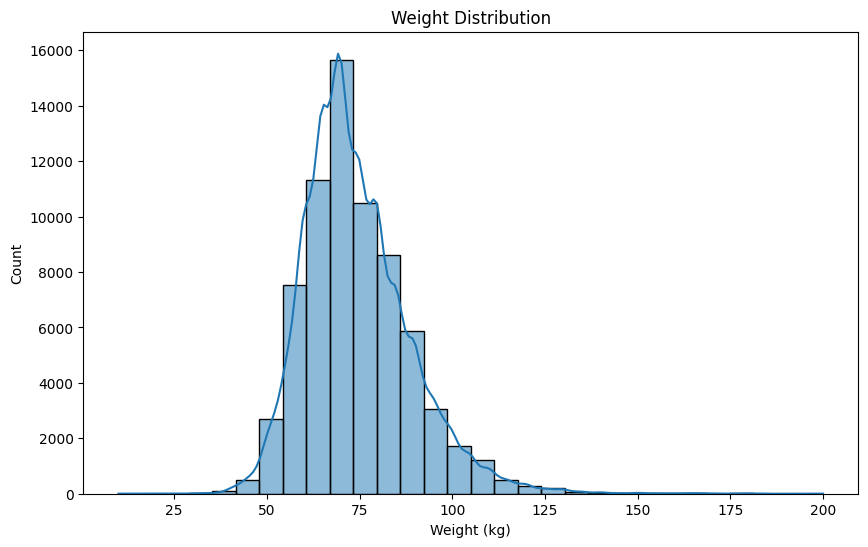

In [17]:

plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()


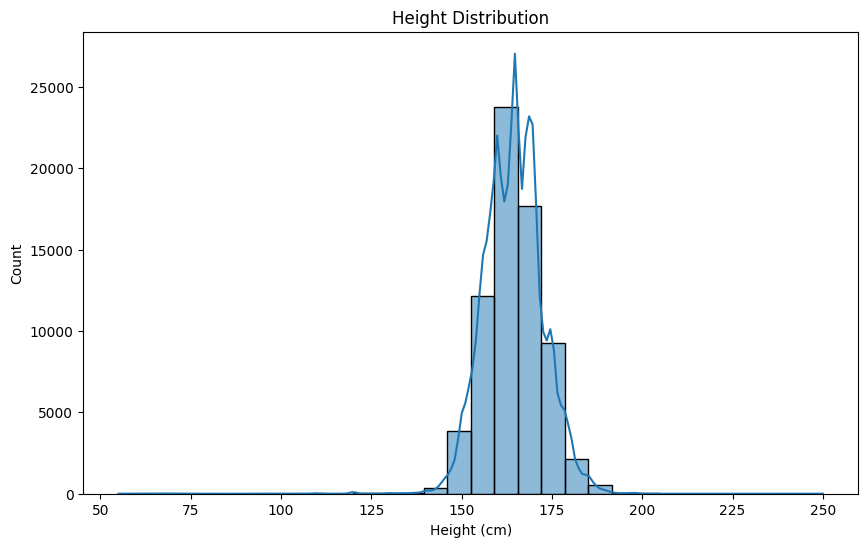

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

Percentage of women with cardiovascular disease: 49.67274324621129 %
Percentage of men with cardiovascular disease: 50.52308949734369 %


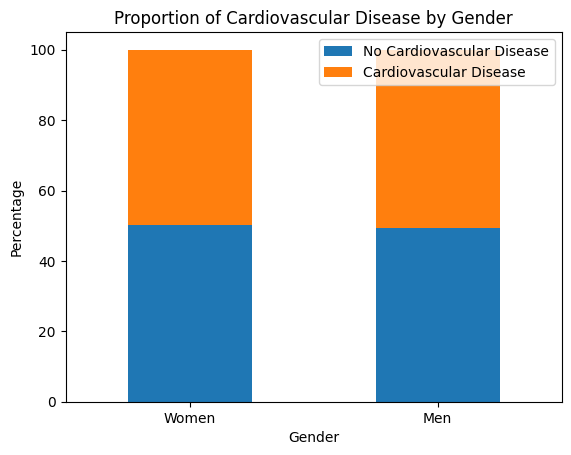

In [20]:
cardio_gender = df.groupby('gender')['cardio'].value_counts(normalize=True).unstack() * 100


print("Percentage of women with cardiovascular disease:", cardio_gender.loc[1, 1], "%")
print("Percentage of men with cardiovascular disease:", cardio_gender.loc[2, 1], "%")


cardio_gender.plot(kind='bar', stacked=True)
plt.title('Proportion of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Women', 'Men'], rotation=0)
plt.legend(['No Cardiovascular Disease', 'Cardiovascular Disease'], loc='upper right')
plt.show()

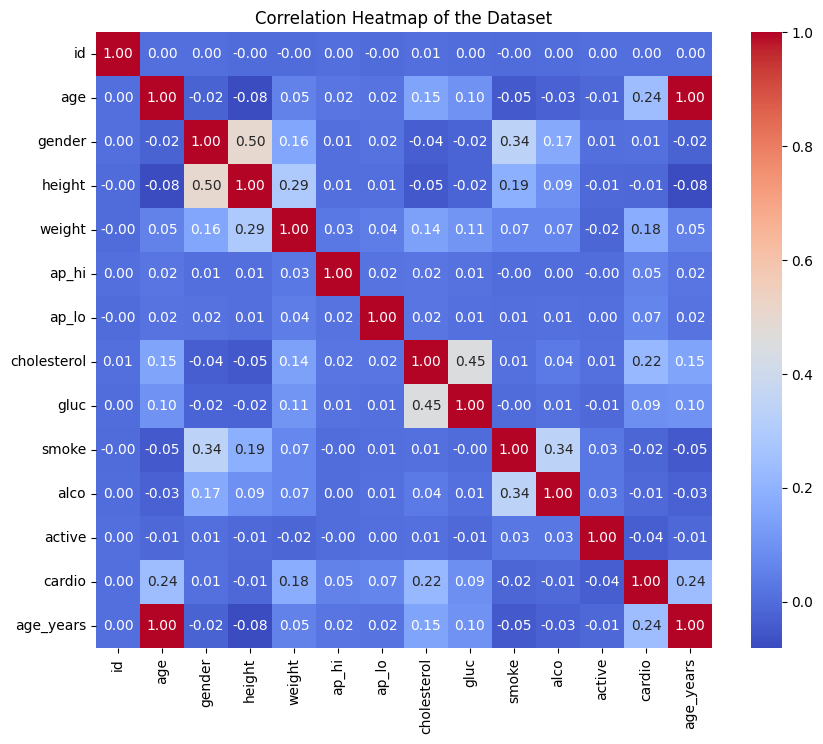

In [21]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

##### Cardio: Age 0.24 weight 0.18 Cholesterol 0.22
##### Cholesterol depending on gluc 0.45
##### One Gender smokes more

### 1.2.1 Feature Engineering
<p>
I detta avsnitt skall du dokumentera vad du gjorde i l ̈opande text. Ta inte med
misstag eller sidosp ̊ar, utan bara vad som faktiskt ledde till det senare resultatet.
Skapa en feature f ̈or BMI (Body Mass Index), l ̈as p ̊a om formeln p ̊a wikipedia.</p>

##### a) 
<p>
Slang de samples med orimliga BMIer och outliers. Notera att detta kan
vara sv ̊art att avg ̈ora i vilket range av BMIer som vi ska spara. Beskriv
hur du kommer fram till gr ̈anserna, med resonemang eller referens.
</p>

##### b)
<p>
Skapa en kategorisk BMI-feature med kategorierna: normal range, over-
weight, obese (class I), obese (class II), obese (class III).
</p>

###### c) 
<p>Undersök om kategorin  ̈ar relevant, dvs dess korrelationer. Uppdatera
data-analysen om du hittar n ̊agot intressant</p>

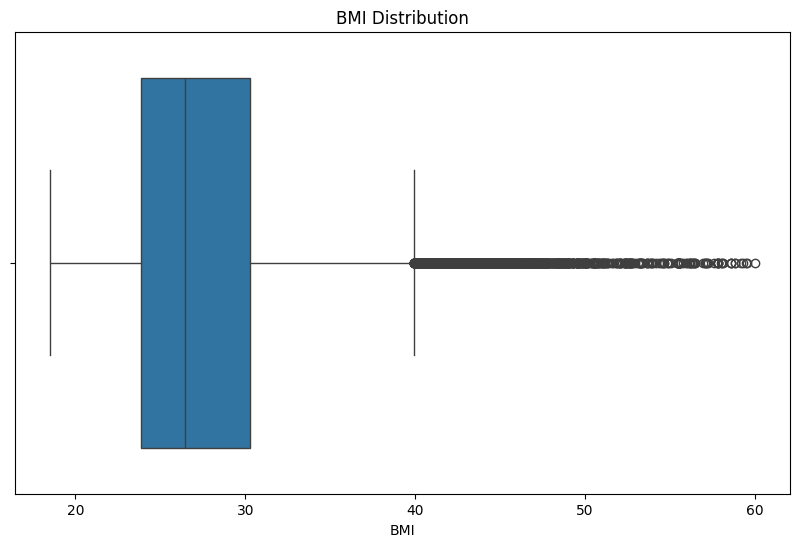

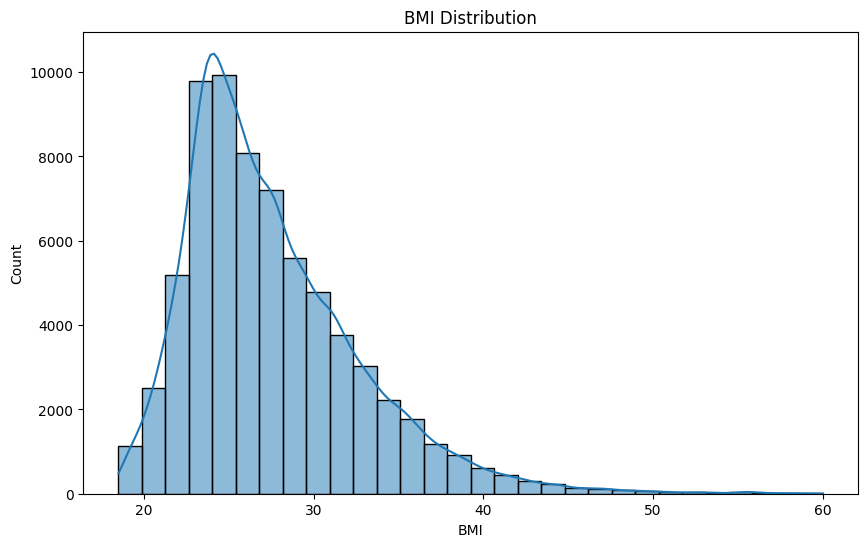

In [31]:
# BMI = Weight / M^2
# Normal range	18.5 – 24.9
# Overweight (Pre-obese)	25.0 – 29.9
# Obese (Class I)	30.0 – 34.9
# Obese (Class II)	35.0 – 39.9
# Obese (Class III)	≥ 40.0

df["height"].head()
df['height_m'] = df['height'] / 100

df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Drop any BMI over 60 and under 18.5
df_filtered = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 60)]

# Plotting the BMI values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['BMI'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

# Alternatively, you can use a histogram to see the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


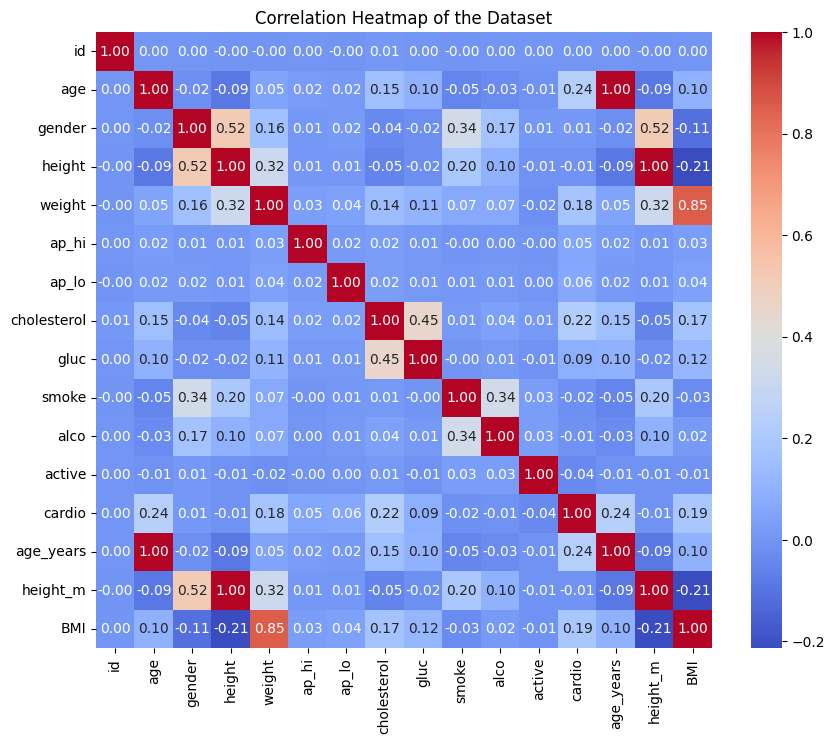

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_m,BMI
count,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000,69284.000000
mean,49958.039086,19475.882412,1.349864,164.399385,74.416156,128.919621,96.751559,1.368353,1.227484,0.087914,0.053808,0.803360,0.501761,53.322060,1.643994,27.573454
std,28850.390042,2463.812705,0.476930,7.928903,14.088106,154.737347,189.196130,0.681482,0.573554,0.283171,0.225639,0.397461,0.500001,6.745552,0.079289,5.162469
min,0.000000,10798.000000,1.000000,98.000000,30.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.563313,0.980000,18.507766
25%,24990.750000,17679.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.402464,1.590000,23.875115
50%,49970.000000,19706.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,53.952088,1.650000,26.446281
75%,74868.250000,21329.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.395619,1.700000,30.299205
max,99999.000000,23713.000000,2.000000,200.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656,2.000000,60.000000


In [33]:
# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

df_filtered.describe()

In [34]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal range'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese (Class I)'
    elif 35 <= bmi < 40:
        return 'Obese (Class II)'
    else:  # BMI >= 40
        return 'Obese (Class III)'

df_filtered["BMI_Category"] = df_filtered["BMI"].apply(categorize_bmi)

df_filtered

C:\Users\johan\AppData\Local\Temp\ipykernel_20556\2897449571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["BMI_Category"] = df_filtered["BMI"].apply(categorize_bmi)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_m,BMI,BMI_Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290,1.68,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246,1.56,34.927679,Obese (Class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652,1.65,23.507805,Normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144,1.69,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205,1.56,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.676249,1.68,26.927438,Overweight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.878166,1.58,50.472681,Obese (Class III)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.199863,1.83,31.353579,Obese (Class I)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.412731,1.63,27.099251,Overweight


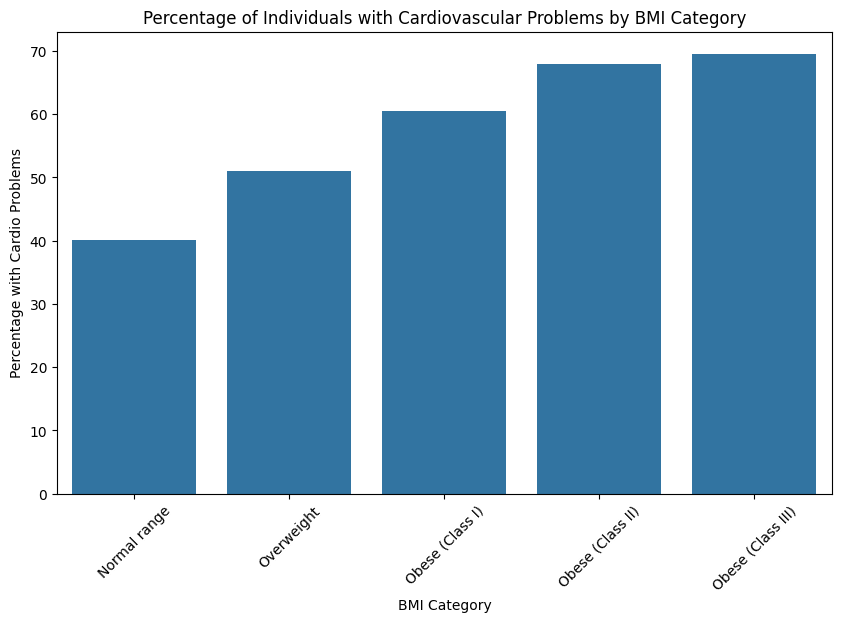

In [36]:
cardio_by_bmi = df_filtered.groupby('BMI_Category')['cardio'].mean() * 100

# Convert the Series to DataFrame for better handling in the plotting
cardio_by_bmi_df = cardio_by_bmi.reset_index(name='Percentage with Cardio Problems')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Percentage with Cardio Problems', data=cardio_by_bmi_df, order=['Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'])
plt.title('Percentage of Individuals with Cardiovascular Problems by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage with Cardio Problems')
plt.xticks(rotation=45)
plt.show()

In [37]:
df_filtered.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_m,BMI,BMI_Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290,1.68,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246,1.56,34.927679,Obese (Class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652,1.65,23.507805,Normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144,1.69,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205,1.56,23.011177,Normal range


In [41]:
# Create the first DataFrame copy
df1 = df_filtered.copy()
# Drop specific columns
df1.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'BMI', "height_m"], axis=1, inplace=True)
# Perform one-hot encoding on BMI-category, blood pressure category, and gender
df1 = pd.get_dummies(df1, columns=['BMI_Category','gender'])

# Create the second DataFrame copy
df2 = df_filtered.copy()
# Drop specific columns
df2.drop(['BMI_Category', 'height', 'weight'], axis=1, inplace=True)
# Perform one-hot encoding on gender
df2 = pd.get_dummies(df2, columns=['gender'])

df2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_m,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,0,50.357290,1.68,21.967120,False,True
1,1,20228,140,90,3,1,0,0,1,1,55.381246,1.56,34.927679,True,False
2,2,18857,130,70,3,1,0,0,0,1,51.627652,1.65,23.507805,True,False
3,3,17623,150,100,1,1,0,0,1,1,48.249144,1.69,28.710479,False,True
4,4,17474,100,60,1,1,0,0,0,0,47.841205,1.56,23.011177,True,False


In [43]:
# Assuming you have a dataset 'df' and a target variable 'target'
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# ... import other algorithms you are interested in

# Split your data into features and target
X = df1.drop(columns=['cardio'])  # replace 'target' with your actual target column name
y = df1['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to perform Grid Search
def perform_grid_search(estimator, param_grid):
    pipeline = make_pipeline(StandardScaler(), estimator)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Define parameter grids for each algorithm
param_grid_rf = {'randomforestclassifier__n_estimators': [100, 200], 'randomforestclassifier__max_depth': [None, 10, 20]}
param_grid_svc = {'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]}
param_grid_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

# Conduct the grid search for each algorithm
best_rf, best_params_rf = perform_grid_search(RandomForestClassifier(), param_grid_rf)
best_svc, best_params_svc = perform_grid_search(SVC(), param_grid_svc)
best_knn, best_params_knn = perform_grid_search(KNeighborsClassifier(), param_grid_knn)

# Now you would evaluate the models using your test set
# For example:
# rf_score = best_rf.score(X_test, y_test)
# svc_score = best_svc.score(X_test, y_test)
# knn_score = best_knn.score(X_test, y_test)

# And then gather and record your findings
# results = {
#     'Random Forest': {'Score': rf_score, 'Best Params': best_params_rf},
#     'SVC': {'Score': svc_score, 'Best Params': best_params_svc},
#     'KNN': {'Score': knn_score, 'Best Params': best_params_knn}
# }

In [44]:
rf_score = best_rf.score(X_test, y_test)
svc_score = best_svc.score(X_test, y_test)
knn_score = best_knn.score(X_test, y_test)
results = {
     'Random Forest': {'Score': rf_score, 'Best Params': best_params_rf},
     'SVC': {'Score': svc_score, 'Best Params': best_params_svc},
     'KNN': {'Score': knn_score, 'Best Params': best_params_knn}
 }

print(results)

In [45]:
print(results)

{'Random Forest': {'Score': 0.6443674677058526, 'Best Params': {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}}, 'SVC': {'Score': 0.6427076567799668, 'Best Params': {'svc__C': 1, 'svc__gamma': 0.1}}, 'KNN': {'Score': 0.6001298982463736, 'Best Params': {'kneighborsclassifier__n_neighbors': 7}}}


In [46]:
from joblib import dump

dump(best_rf, "best_random_forest.joblib")
dump(best_svc, "best_svc.joblib")
dump(best_knn, "best_knn.joblib")

['best_knn.joblib']

In [47]:
# Evaluate accuracy on the training data
accuracy_rf = best_rf.score(X_train, y_train)
accuracy_svc = best_svc.score(X_train, y_train)
accuracy_knn = best_knn.score(X_train, y_train)

print(f"Random Forest Training Accuracy: {accuracy_rf}")
print(f"SVC Training Accuracy: {accuracy_svc}")
print(f"KNN Training Accuracy: {accuracy_knn}")

Random Forest Training Accuracy: 0.6646399769065617
SVC Training Accuracy: 0.6477348584624821
KNN Training Accuracy: 0.7077958395727714


In [ ]:
#If you don't want to run the 45min training session use 
# from joblib import load

#best_rf = load('best_random_forest.joblib')
#best_svc = load('best_svc.joblib')
#best_knn = load('best_knn.joblib')

,id,age,cholesterol,gluc,smoke,alco,active,age_years,BMI_Category_Normal range,BMI_Category_Obese (Class I),BMI_Category_Obese (Class II),BMI_Category_Obese (Class III),BMI_Category_Overweight,gender_1,gender_2
155,209,18860,1,1,0,0,1,51.635866,True,False,False,False,False,True,False
45545,65061,14873,1,1,0,0,1,40.720055,False,True,False,False,False,True,False
64614,92231,20601,1,1,0,0,1,56.402464,False,False,True,False,False,True,False
58308,83201,19861,1,1,0,0,1,54.376454,True,False,False,False,False,True,False
29388,42000,18043,1,1,1,0,0,49.399042,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37561,53628,21112,2,1,0,0,1,57.801506,False,True,False,False,False,True,False
6328,9010,21891,1,1,0,0,1,59.934292,False,False,False,False,True,True,False
55444,79096,20714,1,1,0,0,1,56.711841,False,False,False,False,True,False,True
870,1210,22149,3,1,0,0,1,60.640657,False,True,False,False,False,False,True
